Original class distribution:
0    0.8962
1    0.1038
Name: proportion, dtype: float64

Performance with imbalanced data:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1792
           1       0.92      0.66      0.77       208

    accuracy                           0.96      2000
   macro avg       0.94      0.83      0.87      2000
weighted avg       0.96      0.96      0.96      2000


Class distribution after SMOTE:
0    0.5
1    0.5
Name: proportion, dtype: float64

Performance with SMOTE-balanced data:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1792
           1       0.82      0.79      0.80       208

    accuracy                           0.96      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.96      0.96      0.96      2000


ROC AUC Score - Imbalanced: 0.9594337547218406
ROC AUC Score - SMOTE-balanced: 0.9616377275068682


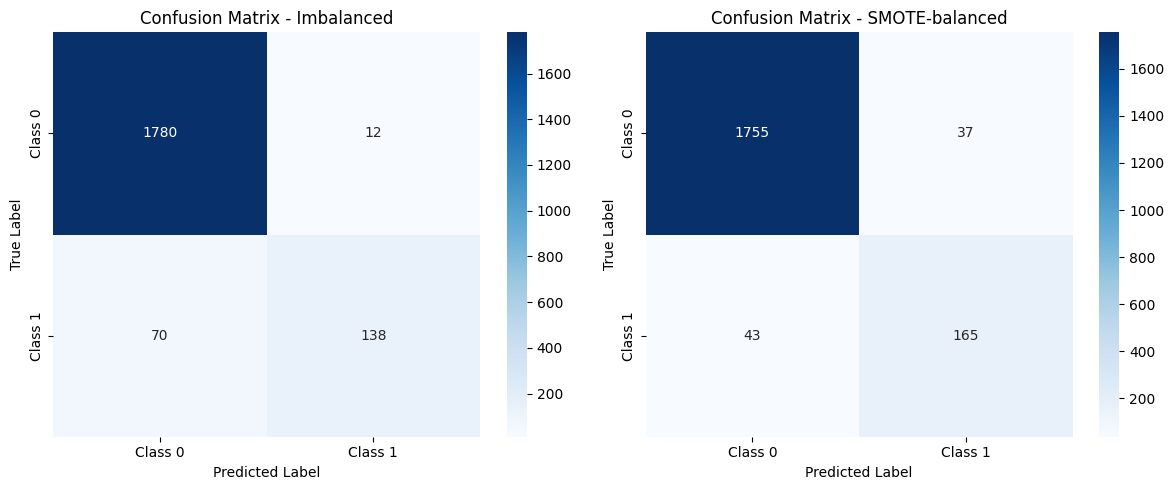

<Figure size 1000x600 with 0 Axes>

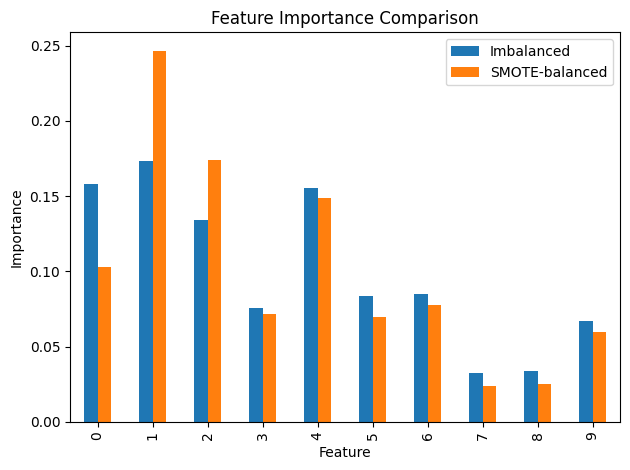

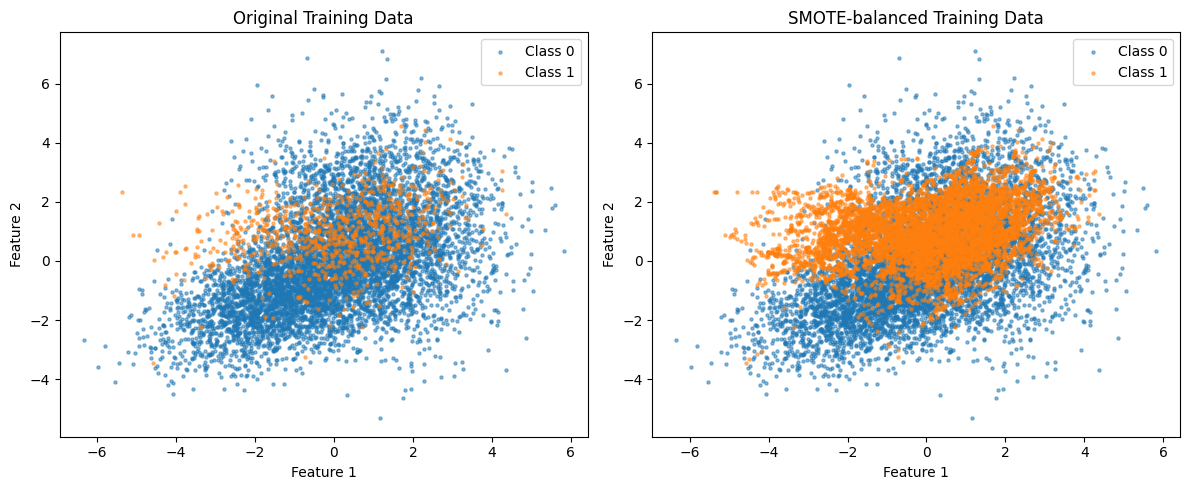

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Create an imbalanced dataset
X, y = make_classification(
    n_samples=10000, 
    n_features=10,
    n_informative=5,
    n_redundant=3,
    n_classes=2,
    weights=[0.9, 0.1],  # 90% class 0, 10% class 1
    random_state=42
)

# Check class distribution
print("Original class distribution:")
print(pd.Series(y).value_counts(normalize=True))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train a model on imbalanced data
clf_imbalanced = RandomForestClassifier(random_state=42)
clf_imbalanced.fit(X_train, y_train)
y_pred_imbalanced = clf_imbalanced.predict(X_test)

print("\nPerformance with imbalanced data:")
print(classification_report(y_test, y_pred_imbalanced))

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts(normalize=True))

# Train a model on the balanced data
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_balanced = clf_balanced.predict(X_test)

print("\nPerformance with SMOTE-balanced data:")
print(classification_report(y_test, y_pred_balanced))

# Compare ROC AUC scores
roc_imbalanced = roc_auc_score(y_test, clf_imbalanced.predict_proba(X_test)[:, 1])
roc_balanced = roc_auc_score(y_test, clf_balanced.predict_proba(X_test)[:, 1])

print("\nROC AUC Score - Imbalanced:", roc_imbalanced)
print("ROC AUC Score - SMOTE-balanced:", roc_balanced)

# Visualize confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm_imbalanced = confusion_matrix(y_test, y_pred_imbalanced)
sns.heatmap(cm_imbalanced, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Imbalanced')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.subplot(1, 2, 2)
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - SMOTE-balanced')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# Feature importance comparison
plt.figure(figsize=(10, 6))
feat_importances_imbalanced = pd.Series(clf_imbalanced.feature_importances_, index=range(10))
feat_importances_balanced = pd.Series(clf_balanced.feature_importances_, index=range(10))

# Create a DataFrame for comparison
feature_importance_df = pd.DataFrame({
    'Imbalanced': feat_importances_imbalanced,
    'SMOTE-balanced': feat_importances_balanced
})

feature_importance_df.plot(kind='bar')
plt.title('Feature Importance Comparison')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

# Visualize the first two features of the data before and after SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], 
           alpha=0.5, label='Class 0', s=5)
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], 
           alpha=0.5, label='Class 1', s=5)
plt.title('Original Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_train_balanced[y_train_balanced==0, 0], 
           X_train_balanced[y_train_balanced==0, 1], 
           alpha=0.5, label='Class 0', s=5)
plt.scatter(X_train_balanced[y_train_balanced==1, 0], 
           X_train_balanced[y_train_balanced==1, 1], 
           alpha=0.5, label='Class 1', s=5)
plt.title('SMOTE-balanced Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

Original class distribution:
Counter({np.int64(0): 8962, np.int64(1): 1038})
Class imbalance ratio: 1:8.6

Training with imbalanced data:
Training set class distribution: Counter({np.int64(0): 7170, np.int64(1): 830})

--- Baseline (Imbalanced Data) ---
Confusion Matrix:
[[1780   12]
 [  70  138]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1792
           1       0.92      0.66      0.77       208

    accuracy                           0.96      2000
   macro avg       0.94      0.83      0.87      2000
weighted avg       0.96      0.96      0.96      2000

ROC-AUC Score: 0.9594

Random Over-sampling:
Resampled class distribution: Counter({np.int64(0): 7170, np.int64(1): 7170})

--- Random Over-sampling ---
Confusion Matrix:
[[1768   24]
 [  59  149]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1792
           1       

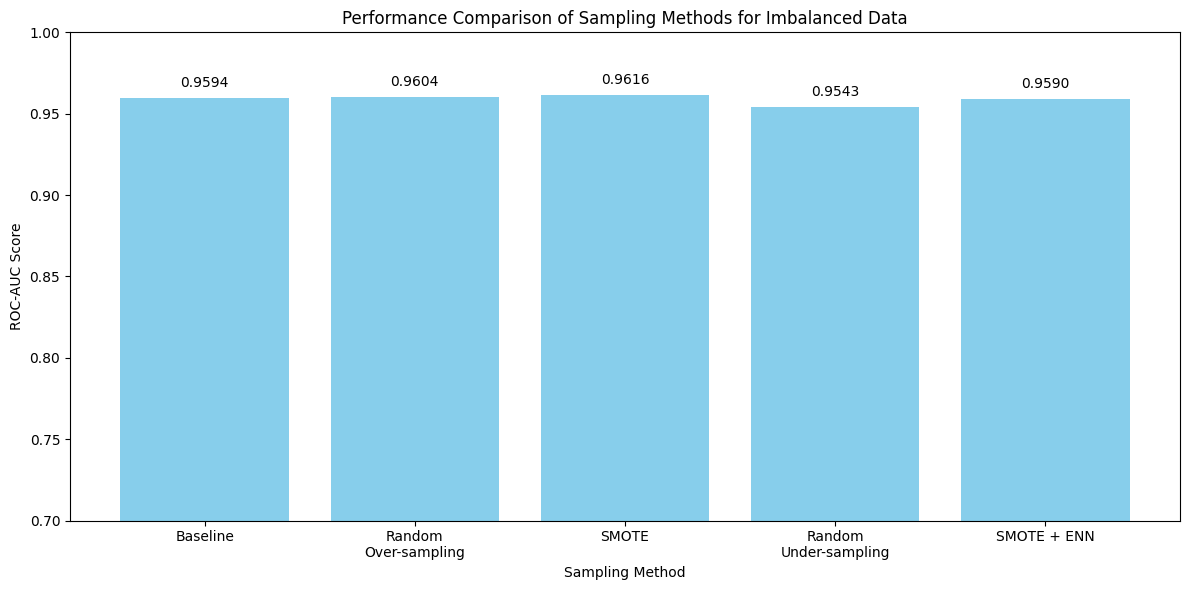

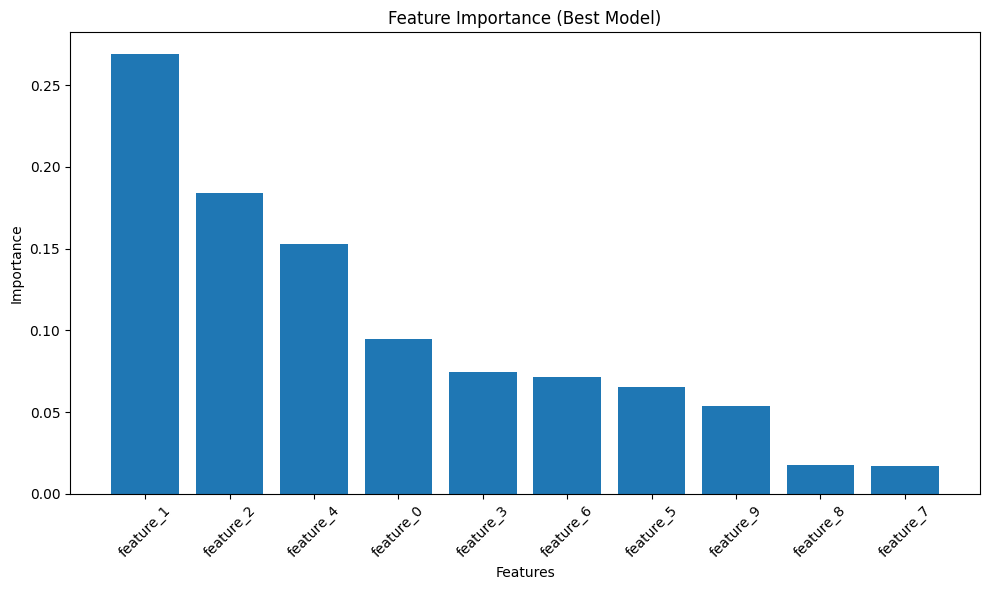

In [4]:
## Under and over sampling example

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter

# Set random seed for reproducibility
np.random.seed(42)

# Generate a synthetic imbalanced dataset (1:10 ratio)
X, y = make_classification(
    n_samples=10000, 
    n_features=10,
    n_informative=5,
    n_redundant=3,
    n_classes=2,
    weights=[0.9, 0.1],  # 90% class 0, 10% class 1
    random_state=42
)

# Convert to DataFrame for better visualization
data = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
data['target'] = y

# Display class distribution
print("Original class distribution:")
print(Counter(y))
print(f"Class imbalance ratio: 1:{Counter(y)[0]/Counter(y)[1]:.1f}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Function to train and evaluate a model
def evaluate_model(X_train, y_train, X_test, y_test, model_name):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Calculate ROC-AUC score
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    
    return model, roc_auc

# 1. Train model on imbalanced data (baseline)
print("\nTraining with imbalanced data:")
print(f"Training set class distribution: {Counter(y_train)}")
baseline_model, baseline_auc = evaluate_model(X_train, y_train, X_test, y_test, "Baseline (Imbalanced Data)")

# 2. Random Over-sampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print("\nRandom Over-sampling:")
print(f"Resampled class distribution: {Counter(y_ros)}")
ros_model, ros_auc = evaluate_model(X_ros, y_ros, X_test, y_test, "Random Over-sampling")

# 3. SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("\nSMOTE:")
print(f"Resampled class distribution: {Counter(y_smote)}")
smote_model, smote_auc = evaluate_model(X_smote, y_smote, X_test, y_test, "SMOTE")

# 4. Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print("\nRandom Under-sampling:")
print(f"Resampled class distribution: {Counter(y_rus)}")
rus_model, rus_auc = evaluate_model(X_rus, y_rus, X_test, y_test, "Random Under-sampling")

# 5. Combined approach: SMOTE + ENN (Edited Nearest Neighbors)
smoteenn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)
print("\nSMOTE + ENN:")
print(f"Resampled class distribution: {Counter(y_smoteenn)}")
smoteenn_model, smoteenn_auc = evaluate_model(X_smoteenn, y_smoteenn, X_test, y_test, "SMOTE + ENN")

# Compare ROC-AUC scores with bar plot
methods = ['Baseline', 'Random\nOver-sampling', 'SMOTE', 'Random\nUnder-sampling', 'SMOTE + ENN']
auc_scores = [baseline_auc, ros_auc, smote_auc, rus_auc, smoteenn_auc]

plt.figure(figsize=(12, 6))
bars = plt.bar(methods, auc_scores, color='skyblue')
plt.ylim(0.7, 1.0)  # Adjust y-axis for better visualization
plt.xlabel('Sampling Method')
plt.ylabel('ROC-AUC Score')
plt.title('Performance Comparison of Sampling Methods for Imbalanced Data')

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Additional analysis: Feature importance for best model
best_model = smoteenn_model  # Replace with the best performing model
feature_importances = best_model.feature_importances_
features = [f'feature_{i}' for i in range(X.shape[1])]

# Sort feature importances
indices = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in indices]
sorted_importances = feature_importances[indices]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), sorted_importances, align="center")
plt.xticks(range(X.shape[1]), sorted_features, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Best Model)')
plt.tight_layout()
plt.show()